# Assignment_18_Q2_Forecasting_(Cococola)

## Import necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [9]:
Coca_Cola = pd.read_csv('CocaCola_Sales_Rawdata.csv')
Coca_Cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# Data Understanding

In [10]:
Coca_Cola.dtypes

Quarter     object
Sales      float64
dtype: object

In [11]:
Coca_Cola.shape

(42, 2)

In [12]:
Coca_Cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [13]:
Coca_Cola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

## Data Visulisation

<AxesSubplot:>

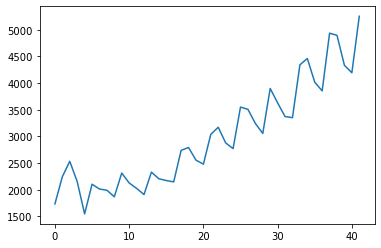

In [14]:
Coca_Cola.Sales.plot()

<AxesSubplot:xlabel='Sales'>

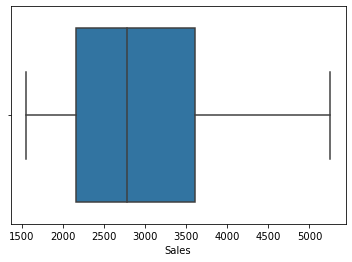

In [15]:
sns.boxplot(Coca_Cola.Sales)

<Figure size 1080x576 with 0 Axes>

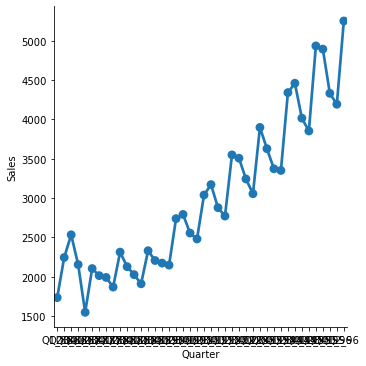

<Figure size 1080x576 with 0 Axes>

In [16]:
sns.factorplot('Quarter','Sales',data=Coca_Cola)
plt.figure(figsize=(15,8))

# Data Driven Based

## Moving Average

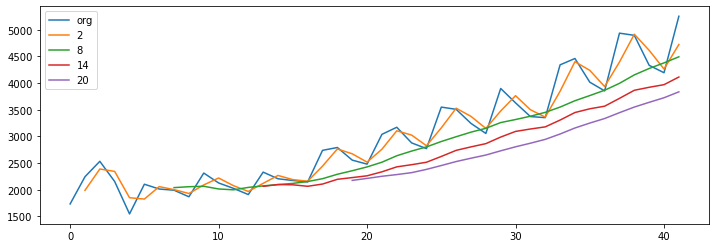

In [17]:
plt.figure(figsize=(12,4))
Coca_Cola.Sales.plot(label="org")
for i in range(2,24,6):
    Coca_Cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot

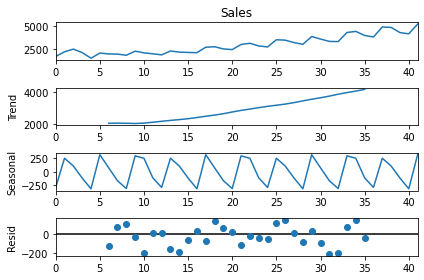

In [18]:
decompose_ts_add = seasonal_decompose(Coca_Cola.Sales,freq=12,model="additive")
decompose_ts_add.plot()
plt.show()

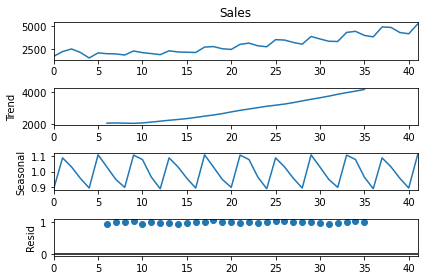

In [19]:
decompose_ts_add = seasonal_decompose(Coca_Cola.Sales,freq=12,model="multiplicative")
decompose_ts_add.plot()
plt.show()

# ACF and PACF plots

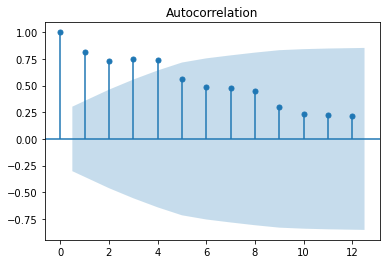

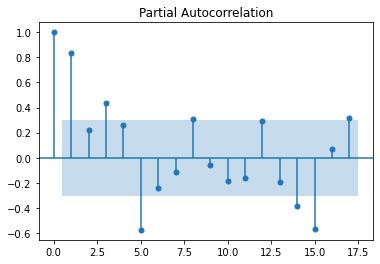

In [20]:
tsa_plots.plot_acf(Coca_Cola.Sales,lags=12)
tsa_plots.plot_pacf(Coca_Cola.Sales)
plt.show()

## Model Building

In [21]:
Train = Coca_Cola.head(32)
Test  = Coca_Cola.tail(10)

In [22]:
# Evulation Matrix MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# 1.Simple Exponential Method

In [23]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

19.816640455798858

## 2.Holt Method

In [24]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

18.83616514133983

## 3.Holts winter exponential smoothing with additive seasonality and additive trend

In [25]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

10.24051252530575

## 4.Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [26]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

8.022117402491011

# From above 4 methods , we can see least MAPE for Holts Method

In [27]:
hw_model = Holt(Coca_Cola["Sales"]).fit()

# Lets see 10 future forecast

In [28]:
hw_model.forecast(10)

42    4973.233386
43    5088.057151
44    5202.880917
45    5317.704682
46    5432.528448
47    5547.352213
48    5662.175979
49    5776.999744
50    5891.823510
51    6006.647275
dtype: float64

In [29]:
hw_model.params

{'smoothing_level': 0.38635788350218697,
 'smoothing_trend': 0.34772214169016846,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1759.2662099977201,
 'initial_trend': 25.92982572473656,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

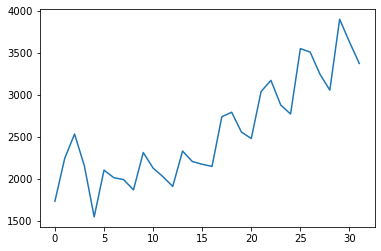

In [30]:
plt.plot(Train.index, Train["Sales"], label='Train')

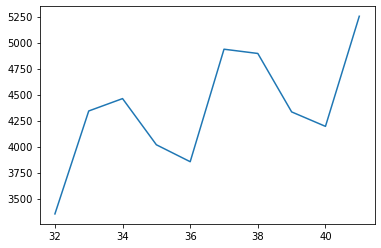

In [31]:
plt.plot(Test.index, Test["Sales"], label='Test')

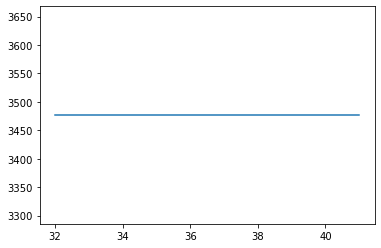

In [32]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential')

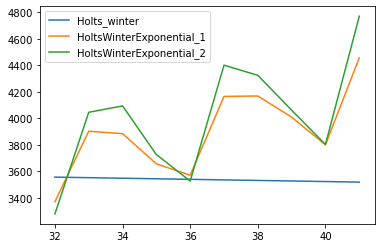

In [33]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2")
plt.legend(loc='best')

## Model Based Methods

In [34]:
quarter=['Q1','Q2','Q3','Q4']
n=Coca_Cola['Quarter'][0]
n[0:2]

Coca_Cola['quarter']=0

In [35]:
for i in range(42):
    n=Coca_Cola['Quarter'][i]
    Coca_Cola['quarter'][i]=n[0:2]
    
dummy=pd.DataFrame(pd.get_dummies(Coca_Cola['quarter']))

Coca_Cola_1=pd.concat((Coca_Cola,dummy),axis=1)
Coca_Cola_1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [36]:
t= np.arange(1,43)
Coca_Cola_1['t']=t
Coca_Cola_1['t_square']=Coca_Cola_1['t']*Coca_Cola_1['t']
log_Sales=np.log(Coca_Cola_1['Sales'])
Coca_Cola_1['log_Sales']=log_Sales

In [37]:
Coca_Cola_1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


# Model Building | Training | Testing

In [38]:
Train = Coca_Cola_1.head(32)
Test  = Coca_Cola_1.tail(10)

## 1. Linear model

In [39]:
linear= smf.ols('Sales~t',data=Train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmselin=np.sqrt((np.mean(np.array(Test['Sales'])-np.array(predlin))**2))
rmselin

603.8900129055171

## 2. Quadratic Model

In [40]:
quad=smf.ols('Sales~t+t_square',data=Train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predquad))**2))
rmsequad

457.73573555935064

# 3. Exponential model

In [41]:
expo=smf.ols('log_Sales~t',data=Train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(Test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

590.3316432612896

## 4.Additive seasonality

In [42]:
additive = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predadd = pd.Series(additive.predict(Test[['Q1','Q2','Q3','Q4']]))
rmseadd = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predadd))**2))
rmseadd

1850.4665461690347

## 5.Additive seasonality with linear trend

In [43]:
addlinear = smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predaddlinear = pd.Series(addlinear.predict(Test[['t','Q1','Q2','Q3','Q4']]))
rmseaddlinear=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

673.4432893250381

# 6.Additive seasonality with quadratic trend

In [44]:
addquad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
predaddquad = pd.Series(addquad.predict(Test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmseaddquad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

277.35107711477355

## 7.Multiplicative seasonality

In [45]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(Test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1908.250394817422

## 8.Multiplicative seasonality with linear trend

In [46]:
mullin = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predmullin = pd.Series(mullin.predict(Test[['t','Q1','Q2','Q3','Q4']]))
rmsemulin=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predmullin))**2))
rmsemul

1908.250394817422

## 9.Multiplicative seasonality with quadratic trend

In [47]:
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(Test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

801.9777858132112

# Compare RMSE Value

In [48]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
      'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data)

In [49]:
table_rmse

,Model,Values
0,rmse_mul_quad,801.977786
1,rmseadd,1850.466546
2,rmseaddlinear,673.443289
3,rmseaddquad,277.351077
4,rmseexpo,590.331643
5,rmselin,603.890013
6,rmsemul,1908.250395
7,rmsemulin,4387.942188
8,rmsequad,457.735736


From above table we can see RMSE forAdditive Seasonality with quardtic giving less value, so that is best model